In [13]:
import pandas as pd
import numpy as np

import os
import pickle

from sklearn.ensemble import BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model  import LogisticRegression

from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.model_selection import train_test_split

from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from catboost import CatBoostClassifier

from sklearn.pipeline import Pipeline
from sklearn.base import TransformerMixin

In [14]:
tweets = pd.read_csv('trainDatasets/features_generadas.csv') #carga de modelo generado con tweets de usuarios

In [15]:
tweets.head(2)

,user_id,user_id.1,bot,Cat,tweetsCount,semanas,lun,mar,mie,jue,...,num_mentions_mean,num_mentions_median,num_mentions_std,num_mentions_fq,num_mentions_tq,reply_count_mean,reply_count_median,reply_count_std,reply_count_fq,reply_count_tq
0,678033.0,678033.0,False,Humans,300,4,12.666667,17.666667,8.333333,19.333333,...,9313.304721,10000.0,8781.379387,0.0,10000.0,0.0,0.0,0.0,0.0,0.0
1,722623.0,722623.0,False,Humans,300,10,4.444444,4.000000,3.888889,4.600000,...,5591.836735,0.0,6086.528956,0.0,10000.0,0.0,0.0,0.0,0.0,0.0


In [16]:
pipeline = Pipeline([
    ('cat', CatBoostClassifier())
])

le = preprocessing.LabelEncoder()
x = tweets.drop(['Cat','user_id','user_id.1','bot'],axis=1)
y =  le.fit_transform(tweets['bot'])

X_train, X_test, y_train, y_test = train_test_split(x, y)

pipeline.fit(X_train, y_train)

Learning rate set to 0.025637
0:	learn: 0.6398300	total: 54.5ms	remaining: 54.5s
1:	learn: 0.5824591	total: 98.7ms	remaining: 49.3s
2:	learn: 0.5305918	total: 146ms	remaining: 48.4s
3:	learn: 0.4806863	total: 194ms	remaining: 48.4s
4:	learn: 0.4414868	total: 241ms	remaining: 47.9s
5:	learn: 0.4066990	total: 284ms	remaining: 47s
6:	learn: 0.3791247	total: 334ms	remaining: 47.3s
7:	learn: 0.3480868	total: 379ms	remaining: 47s
8:	learn: 0.3195122	total: 429ms	remaining: 47.2s
9:	learn: 0.2960593	total: 471ms	remaining: 46.7s
10:	learn: 0.2763998	total: 516ms	remaining: 46.4s
11:	learn: 0.2543065	total: 559ms	remaining: 46.1s
12:	learn: 0.2372426	total: 607ms	remaining: 46.1s
13:	learn: 0.2207614	total: 656ms	remaining: 46.2s
14:	learn: 0.2099610	total: 698ms	remaining: 45.8s
15:	learn: 0.1973282	total: 739ms	remaining: 45.4s
16:	learn: 0.1844699	total: 789ms	remaining: 45.6s
17:	learn: 0.1746431	total: 835ms	remaining: 45.6s
18:	learn: 0.1645808	total: 880ms	remaining: 45.4s
19:	learn: 0.

165:	learn: 0.0370868	total: 7.76s	remaining: 39s
166:	learn: 0.0370518	total: 7.81s	remaining: 39s
167:	learn: 0.0370189	total: 7.86s	remaining: 38.9s
168:	learn: 0.0369156	total: 7.9s	remaining: 38.8s
169:	learn: 0.0368246	total: 7.94s	remaining: 38.8s
170:	learn: 0.0367926	total: 8s	remaining: 38.8s
171:	learn: 0.0367845	total: 8.04s	remaining: 38.7s
172:	learn: 0.0367643	total: 8.08s	remaining: 38.6s
173:	learn: 0.0367008	total: 8.12s	remaining: 38.6s
174:	learn: 0.0364572	total: 8.17s	remaining: 38.5s
175:	learn: 0.0362982	total: 8.21s	remaining: 38.5s
176:	learn: 0.0361857	total: 8.26s	remaining: 38.4s
177:	learn: 0.0360787	total: 8.3s	remaining: 38.3s
178:	learn: 0.0360719	total: 8.34s	remaining: 38.2s
179:	learn: 0.0360550	total: 8.38s	remaining: 38.2s
180:	learn: 0.0360480	total: 8.4s	remaining: 38s
181:	learn: 0.0360323	total: 8.45s	remaining: 38s
182:	learn: 0.0360102	total: 8.49s	remaining: 37.9s
183:	learn: 0.0359368	total: 8.53s	remaining: 37.8s
184:	learn: 0.0358789	tota

325:	learn: 0.0279721	total: 14.8s	remaining: 30.6s
326:	learn: 0.0279347	total: 14.8s	remaining: 30.5s
327:	learn: 0.0279197	total: 14.9s	remaining: 30.5s
328:	learn: 0.0279156	total: 14.9s	remaining: 30.4s
329:	learn: 0.0278379	total: 15s	remaining: 30.4s
330:	learn: 0.0278311	total: 15s	remaining: 30.3s
331:	learn: 0.0277858	total: 15s	remaining: 30.3s
332:	learn: 0.0277826	total: 15.1s	remaining: 30.2s
333:	learn: 0.0277615	total: 15.1s	remaining: 30.1s
334:	learn: 0.0277608	total: 15.1s	remaining: 30s
335:	learn: 0.0277563	total: 15.2s	remaining: 29.9s
336:	learn: 0.0277023	total: 15.2s	remaining: 29.9s
337:	learn: 0.0277002	total: 15.3s	remaining: 29.9s
338:	learn: 0.0276815	total: 15.3s	remaining: 29.8s
339:	learn: 0.0276718	total: 15.3s	remaining: 29.8s
340:	learn: 0.0274699	total: 15.4s	remaining: 29.8s
341:	learn: 0.0274524	total: 15.4s	remaining: 29.7s
342:	learn: 0.0273503	total: 15.5s	remaining: 29.7s
343:	learn: 0.0272000	total: 15.5s	remaining: 29.6s
344:	learn: 0.027143

484:	learn: 0.0229580	total: 21.6s	remaining: 23s
485:	learn: 0.0229567	total: 21.7s	remaining: 22.9s
486:	learn: 0.0229493	total: 21.7s	remaining: 22.9s
487:	learn: 0.0229454	total: 21.7s	remaining: 22.8s
488:	learn: 0.0229329	total: 21.8s	remaining: 22.8s
489:	learn: 0.0229322	total: 21.8s	remaining: 22.7s
490:	learn: 0.0229309	total: 21.9s	remaining: 22.7s
491:	learn: 0.0229173	total: 21.9s	remaining: 22.6s
492:	learn: 0.0229148	total: 22s	remaining: 22.6s
493:	learn: 0.0229136	total: 22s	remaining: 22.5s
494:	learn: 0.0228176	total: 22s	remaining: 22.5s
495:	learn: 0.0227644	total: 22.1s	remaining: 22.4s
496:	learn: 0.0227636	total: 22.1s	remaining: 22.4s
497:	learn: 0.0226579	total: 22.2s	remaining: 22.4s
498:	learn: 0.0226364	total: 22.2s	remaining: 22.3s
499:	learn: 0.0226336	total: 22.3s	remaining: 22.3s
500:	learn: 0.0225343	total: 22.3s	remaining: 22.2s
501:	learn: 0.0224789	total: 22.4s	remaining: 22.2s
502:	learn: 0.0224560	total: 22.4s	remaining: 22.1s
503:	learn: 0.022454

644:	learn: 0.0193626	total: 28.4s	remaining: 15.7s
645:	learn: 0.0193211	total: 28.5s	remaining: 15.6s
646:	learn: 0.0193109	total: 28.5s	remaining: 15.6s
647:	learn: 0.0193031	total: 28.6s	remaining: 15.5s
648:	learn: 0.0193024	total: 28.6s	remaining: 15.5s
649:	learn: 0.0192723	total: 28.7s	remaining: 15.4s
650:	learn: 0.0192572	total: 28.7s	remaining: 15.4s
651:	learn: 0.0192342	total: 28.8s	remaining: 15.4s
652:	learn: 0.0192334	total: 28.8s	remaining: 15.3s
653:	learn: 0.0191934	total: 28.9s	remaining: 15.3s
654:	learn: 0.0191874	total: 28.9s	remaining: 15.2s
655:	learn: 0.0191422	total: 28.9s	remaining: 15.2s
656:	learn: 0.0191422	total: 29s	remaining: 15.1s
657:	learn: 0.0191420	total: 29s	remaining: 15.1s
658:	learn: 0.0191408	total: 29.1s	remaining: 15s
659:	learn: 0.0191363	total: 29.1s	remaining: 15s
660:	learn: 0.0191355	total: 29.1s	remaining: 14.9s
661:	learn: 0.0190434	total: 29.2s	remaining: 14.9s
662:	learn: 0.0190424	total: 29.2s	remaining: 14.9s
663:	learn: 0.019024

806:	learn: 0.0168914	total: 35.4s	remaining: 8.47s
807:	learn: 0.0168700	total: 35.5s	remaining: 8.43s
808:	learn: 0.0167900	total: 35.5s	remaining: 8.38s
809:	learn: 0.0167702	total: 35.5s	remaining: 8.34s
810:	learn: 0.0167700	total: 35.6s	remaining: 8.29s
811:	learn: 0.0167327	total: 35.6s	remaining: 8.25s
812:	learn: 0.0167321	total: 35.7s	remaining: 8.21s
813:	learn: 0.0167276	total: 35.7s	remaining: 8.16s
814:	learn: 0.0167248	total: 35.8s	remaining: 8.12s
815:	learn: 0.0167244	total: 35.8s	remaining: 8.07s
816:	learn: 0.0167229	total: 35.9s	remaining: 8.03s
817:	learn: 0.0167219	total: 35.9s	remaining: 7.99s
818:	learn: 0.0167214	total: 35.9s	remaining: 7.94s
819:	learn: 0.0166501	total: 36s	remaining: 7.9s
820:	learn: 0.0165970	total: 36s	remaining: 7.86s
821:	learn: 0.0165967	total: 36.1s	remaining: 7.81s
822:	learn: 0.0165966	total: 36.1s	remaining: 7.77s
823:	learn: 0.0165888	total: 36.2s	remaining: 7.73s
824:	learn: 0.0165828	total: 36.2s	remaining: 7.69s
825:	learn: 0.016

966:	learn: 0.0153714	total: 42.7s	remaining: 1.46s
967:	learn: 0.0153092	total: 42.8s	remaining: 1.41s
968:	learn: 0.0153091	total: 42.8s	remaining: 1.37s
969:	learn: 0.0153090	total: 42.8s	remaining: 1.32s
970:	learn: 0.0153088	total: 42.9s	remaining: 1.28s
971:	learn: 0.0153071	total: 42.9s	remaining: 1.24s
972:	learn: 0.0152997	total: 43s	remaining: 1.19s
973:	learn: 0.0152928	total: 43s	remaining: 1.15s
974:	learn: 0.0152924	total: 43.1s	remaining: 1.1s
975:	learn: 0.0152553	total: 43.1s	remaining: 1.06s
976:	learn: 0.0152537	total: 43.2s	remaining: 1.02s
977:	learn: 0.0152535	total: 43.2s	remaining: 972ms
978:	learn: 0.0152516	total: 43.2s	remaining: 928ms
979:	learn: 0.0152509	total: 43.3s	remaining: 883ms
980:	learn: 0.0152507	total: 43.3s	remaining: 839ms
981:	learn: 0.0152498	total: 43.4s	remaining: 795ms
982:	learn: 0.0152496	total: 43.4s	remaining: 751ms
983:	learn: 0.0152490	total: 43.5s	remaining: 707ms
984:	learn: 0.0152152	total: 43.5s	remaining: 662ms
985:	learn: 0.015

Pipeline(memory=None,
     steps=[('cat', <catboost.core.CatBoostClassifier object at 0x000001BD85A644A8>)])

El valor del AUC es:  0.9957643314097383


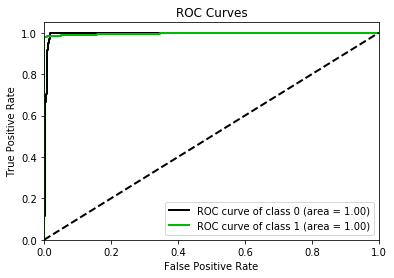

In [17]:
y_predicted_cat = pipeline.predict_proba(X_test)
y_pred = pipeline.predict(X_test)

from sklearn.metrics import roc_auc_score
cat_auc = roc_auc_score(y_test,y_predicted_cat[:,1])
print("El valor del AUC es: ", cat_auc)
from scikitplot.metrics import plot_roc
%matplotlib inline
plot_roc(y_test,y_predicted_cat, plot_micro = False, plot_macro= False)

In [18]:
# Matriz de Confusión
conf = confusion_matrix(y_test, y_pred)
predicted_cols = ['pred_'+str(c) for c in le.classes_]
display(pd.DataFrame(conf, index= ['real_Human','real_Bot'],columns = ['pred_Human','pred_Bot']))
print(classification_report(y_test, y_pred))

,pred_Human,pred_Bot
real_Human,249,8
real_Bot,22,1220


             precision    recall  f1-score   support

          0       0.92      0.97      0.94       257
          1       0.99      0.98      0.99      1242

avg / total       0.98      0.98      0.98      1499



In [19]:
# Re-Entrenar con el dataset completo
modelo = pipeline.fit(tweets.drop(['Cat','user_id','user_id.1','bot'],axis=1), y)

Learning rate set to 0.027812
0:	learn: 0.6231524	total: 48.2ms	remaining: 48.2s
1:	learn: 0.5700602	total: 91.2ms	remaining: 45.5s
2:	learn: 0.5215677	total: 140ms	remaining: 46.5s
3:	learn: 0.4668124	total: 188ms	remaining: 46.7s
4:	learn: 0.4224836	total: 236ms	remaining: 47s
5:	learn: 0.3816953	total: 283ms	remaining: 46.8s
6:	learn: 0.3496239	total: 328ms	remaining: 46.6s
7:	learn: 0.3230778	total: 378ms	remaining: 46.9s
8:	learn: 0.2962826	total: 437ms	remaining: 48.1s
9:	learn: 0.2726816	total: 481ms	remaining: 47.6s
10:	learn: 0.2522685	total: 526ms	remaining: 47.3s
11:	learn: 0.2306755	total: 577ms	remaining: 47.5s
12:	learn: 0.2107122	total: 626ms	remaining: 47.5s
13:	learn: 0.1932955	total: 672ms	remaining: 47.3s
14:	learn: 0.1803805	total: 722ms	remaining: 47.4s
15:	learn: 0.1676144	total: 772ms	remaining: 47.5s
16:	learn: 0.1577400	total: 822ms	remaining: 47.6s
17:	learn: 0.1480250	total: 867ms	remaining: 47.3s
18:	learn: 0.1393429	total: 911ms	remaining: 47s
19:	learn: 0.

162:	learn: 0.0376890	total: 8s	remaining: 41.1s
163:	learn: 0.0376622	total: 8.05s	remaining: 41.1s
164:	learn: 0.0375846	total: 8.1s	remaining: 41s
165:	learn: 0.0375436	total: 8.14s	remaining: 40.9s
166:	learn: 0.0374533	total: 8.18s	remaining: 40.8s
167:	learn: 0.0373376	total: 8.23s	remaining: 40.8s
168:	learn: 0.0373216	total: 8.27s	remaining: 40.7s
169:	learn: 0.0373000	total: 8.32s	remaining: 40.6s
170:	learn: 0.0372448	total: 8.36s	remaining: 40.5s
171:	learn: 0.0371399	total: 8.4s	remaining: 40.5s
172:	learn: 0.0370393	total: 8.45s	remaining: 40.4s
173:	learn: 0.0369252	total: 8.49s	remaining: 40.3s
174:	learn: 0.0368002	total: 8.53s	remaining: 40.2s
175:	learn: 0.0367766	total: 8.58s	remaining: 40.2s
176:	learn: 0.0367532	total: 8.63s	remaining: 40.1s
177:	learn: 0.0366969	total: 8.67s	remaining: 40.1s
178:	learn: 0.0366862	total: 8.7s	remaining: 39.9s
179:	learn: 0.0366666	total: 8.75s	remaining: 39.8s
180:	learn: 0.0365557	total: 8.79s	remaining: 39.8s
181:	learn: 0.036545

322:	learn: 0.0300838	total: 15.4s	remaining: 32.2s
323:	learn: 0.0300366	total: 15.4s	remaining: 32.2s
324:	learn: 0.0299599	total: 15.5s	remaining: 32.1s
325:	learn: 0.0297751	total: 15.5s	remaining: 32.1s
326:	learn: 0.0297605	total: 15.6s	remaining: 32s
327:	learn: 0.0297575	total: 15.6s	remaining: 32s
328:	learn: 0.0295706	total: 15.6s	remaining: 31.9s
329:	learn: 0.0295581	total: 15.7s	remaining: 31.9s
330:	learn: 0.0295533	total: 15.7s	remaining: 31.8s
331:	learn: 0.0295059	total: 15.8s	remaining: 31.7s
332:	learn: 0.0294552	total: 15.8s	remaining: 31.7s
333:	learn: 0.0294533	total: 15.9s	remaining: 31.6s
334:	learn: 0.0294243	total: 15.9s	remaining: 31.6s
335:	learn: 0.0292860	total: 15.9s	remaining: 31.5s
336:	learn: 0.0292582	total: 16s	remaining: 31.5s
337:	learn: 0.0292406	total: 16s	remaining: 31.4s
338:	learn: 0.0292374	total: 16.1s	remaining: 31.4s
339:	learn: 0.0291742	total: 16.1s	remaining: 31.3s
340:	learn: 0.0291224	total: 16.2s	remaining: 31.3s
341:	learn: 0.029116

482:	learn: 0.0247666	total: 23.1s	remaining: 24.7s
483:	learn: 0.0247545	total: 23.1s	remaining: 24.7s
484:	learn: 0.0247508	total: 23.2s	remaining: 24.6s
485:	learn: 0.0247405	total: 23.3s	remaining: 24.6s
486:	learn: 0.0247377	total: 23.3s	remaining: 24.5s
487:	learn: 0.0247362	total: 23.4s	remaining: 24.5s
488:	learn: 0.0246371	total: 23.4s	remaining: 24.5s
489:	learn: 0.0246287	total: 23.5s	remaining: 24.4s
490:	learn: 0.0246267	total: 23.5s	remaining: 24.4s
491:	learn: 0.0246220	total: 23.6s	remaining: 24.3s
492:	learn: 0.0245682	total: 23.6s	remaining: 24.3s
493:	learn: 0.0245113	total: 23.7s	remaining: 24.2s
494:	learn: 0.0244930	total: 23.7s	remaining: 24.2s
495:	learn: 0.0244898	total: 23.8s	remaining: 24.2s
496:	learn: 0.0243773	total: 23.8s	remaining: 24.1s
497:	learn: 0.0243746	total: 23.9s	remaining: 24.1s
498:	learn: 0.0243459	total: 23.9s	remaining: 24s
499:	learn: 0.0243124	total: 24s	remaining: 24s
500:	learn: 0.0243060	total: 24s	remaining: 23.9s
501:	learn: 0.024287

641:	learn: 0.0207044	total: 30.5s	remaining: 17s
642:	learn: 0.0207038	total: 30.6s	remaining: 17s
643:	learn: 0.0207018	total: 30.6s	remaining: 16.9s
644:	learn: 0.0207014	total: 30.7s	remaining: 16.9s
645:	learn: 0.0207011	total: 30.7s	remaining: 16.8s
646:	learn: 0.0206077	total: 30.8s	remaining: 16.8s
647:	learn: 0.0205974	total: 30.8s	remaining: 16.7s
648:	learn: 0.0205971	total: 30.9s	remaining: 16.7s
649:	learn: 0.0205953	total: 30.9s	remaining: 16.6s
650:	learn: 0.0205891	total: 30.9s	remaining: 16.6s
651:	learn: 0.0205889	total: 31s	remaining: 16.5s
652:	learn: 0.0204869	total: 31s	remaining: 16.5s
653:	learn: 0.0203850	total: 31.1s	remaining: 16.4s
654:	learn: 0.0203845	total: 31.1s	remaining: 16.4s
655:	learn: 0.0203834	total: 31.2s	remaining: 16.4s
656:	learn: 0.0203748	total: 31.2s	remaining: 16.3s
657:	learn: 0.0203657	total: 31.3s	remaining: 16.3s
658:	learn: 0.0202641	total: 31.3s	remaining: 16.2s
659:	learn: 0.0202636	total: 31.4s	remaining: 16.2s
660:	learn: 0.020262

800:	learn: 0.0174881	total: 38.1s	remaining: 9.47s
801:	learn: 0.0174793	total: 38.2s	remaining: 9.42s
802:	learn: 0.0174737	total: 38.2s	remaining: 9.38s
803:	learn: 0.0173961	total: 38.3s	remaining: 9.33s
804:	learn: 0.0173960	total: 38.3s	remaining: 9.28s
805:	learn: 0.0173446	total: 38.4s	remaining: 9.23s
806:	learn: 0.0173056	total: 38.4s	remaining: 9.19s
807:	learn: 0.0172702	total: 38.5s	remaining: 9.14s
808:	learn: 0.0172685	total: 38.5s	remaining: 9.09s
809:	learn: 0.0172000	total: 38.6s	remaining: 9.05s
810:	learn: 0.0171515	total: 38.6s	remaining: 9s
811:	learn: 0.0171512	total: 38.7s	remaining: 8.95s
812:	learn: 0.0171504	total: 38.7s	remaining: 8.9s
813:	learn: 0.0171480	total: 38.8s	remaining: 8.86s
814:	learn: 0.0171478	total: 38.8s	remaining: 8.81s
815:	learn: 0.0171454	total: 38.8s	remaining: 8.76s
816:	learn: 0.0171453	total: 38.9s	remaining: 8.71s
817:	learn: 0.0171399	total: 38.9s	remaining: 8.66s
818:	learn: 0.0171387	total: 39s	remaining: 8.61s
819:	learn: 0.0171

963:	learn: 0.0155272	total: 45.7s	remaining: 1.71s
964:	learn: 0.0155269	total: 45.7s	remaining: 1.66s
965:	learn: 0.0155265	total: 45.8s	remaining: 1.61s
966:	learn: 0.0155247	total: 45.8s	remaining: 1.56s
967:	learn: 0.0155244	total: 45.8s	remaining: 1.51s
968:	learn: 0.0155235	total: 45.9s	remaining: 1.47s
969:	learn: 0.0154370	total: 45.9s	remaining: 1.42s
970:	learn: 0.0154368	total: 46s	remaining: 1.37s
971:	learn: 0.0154366	total: 46s	remaining: 1.32s
972:	learn: 0.0154364	total: 46.1s	remaining: 1.28s
973:	learn: 0.0154086	total: 46.1s	remaining: 1.23s
974:	learn: 0.0153547	total: 46.2s	remaining: 1.18s
975:	learn: 0.0153542	total: 46.2s	remaining: 1.14s
976:	learn: 0.0153521	total: 46.2s	remaining: 1.09s
977:	learn: 0.0153509	total: 46.3s	remaining: 1.04s
978:	learn: 0.0153508	total: 46.3s	remaining: 994ms
979:	learn: 0.0153480	total: 46.4s	remaining: 946ms
980:	learn: 0.0153334	total: 46.4s	remaining: 899ms
981:	learn: 0.0153320	total: 46.5s	remaining: 852ms
982:	learn: 0.01

In [1]:
le.classes_

NameError: name 'le' is not defined

In [21]:
# Exportar Modelo a archivo binario
filename = 'modelTweets.pkl'
with open(filename, 'wb') as twModel:
    pickle.dump(modelo, twModel)